## 提出问题：泰坦尼克号的存活率是否有一定规律？
1. 存活率是否和席别(Pclass)有关？
2. 存活率是否和性别(Sex)有关？
3. 年龄(Age)的区间是否与存活率相关？
4. 独自一人(Alone)和有亲友相伴的存活率是否一致？

## 导入

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file_name=pd.read_csv('titanic-data.csv')

In [64]:
#查看数据信息
file_name.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived.1,female
0,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,1.0
1,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,1.0
2,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1.0
3,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,1.0
4,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1,1.0
5,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,1,1.0
6,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,0,1.0
7,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,NaN
8,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,NaN
9,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0,NaN


In [65]:
# 查看数据具体信息
file_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived.1     891 non-null int64
female         7 non-null float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.5+ KB


可以看出:
- Pclass , Sex , Sibsp,Parch 为分类变量
- 在age，Cabin，Embarked中均存在缺失值  
由于本次分析的变量为:pclass,sex,alone对存活率的影响,均为单变量分析，其余值是否缺失对其不能造成很大影响，因此只需在单独计算age分组的存活率时处理缺失值即可.

### 1. 存活率是否和席别(Pclass)有关？

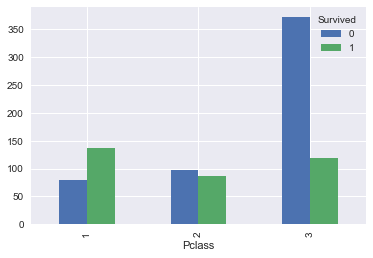

In [436]:
# 存活人数情况
file_name.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.show()

从图中可以看出 , 席别为 3 的死亡人数较高 , 席别1的存活人数较高 .

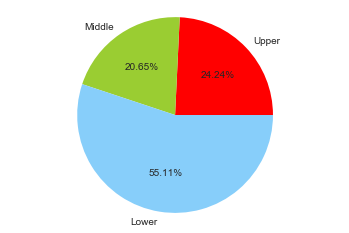

In [437]:
#各席别占比情况
upper=(file_name['Pclass']==1).mean() #Pclass 值为 1(upper) 的占比
middle=(file_name['Pclass']==2).mean() #Pclass 值为 2(middle) 的占比
lower=(file_name['Pclass']==3).mean() #Pclass 值为 3(lower) 的占比
plt.pie([upper,middle,lower],labels=['Upper','Middle','Lower'],autopct='%.2f%%',colors = ['red','yellowgreen','lightskyblue'],shadow = False) #做饼图表示存活率
plt.axis("equal")#绘制标准的圆形图
plt.show()

Upper     0.629630
Middle    0.472826
Lower     0.242363
Name: Survived, dtype: float64
-------------------------------------


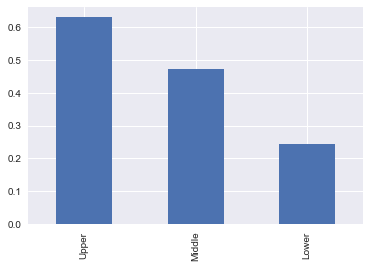

In [438]:
#根据席别计算存活率
pclass_sur_ratio=file_name.groupby('Pclass').mean()['Survived']#各席别存活率
pclass_sur_ratio.index=('Upper','Middle','Lower')
print(pclass_sur_ratio)
print('-------------------------------------')
pclass_sur_ratio.plot(kind='bar')
plt.show()

In [439]:
#相关系数计算
print (np.corrcoef(file_name['Pclass'],file_name['Survived']))

[[ 1.         -0.33848104]
 [-0.33848104  1.        ]]


结论:  
- 席别3(Lower)中人数最多,而存活率最低  
- 席别1(Upper)中人数最少,存活率最高,猜测可能为席别高则保护措施更加完善
- 相关系数仅为0.34,表明这两个变量为为弱相关关系  

### 2. 存活率是否和性别(Sex)有关？

Sex
female    314
male      577
Name: Survived, dtype: int64
----------------------------------
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
----------------------------------
Axes(0.125,0.125;0.775x0.755)


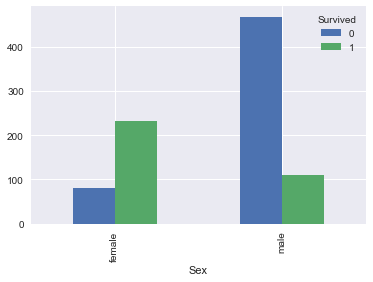

In [440]:
#存活人数情况
sex_sur_ratio=file_name.groupby('Sex').count()['Survived']#男性人数和女性人数
print (sex_sur_ratio)
print('----------------------------------')
print(file_name.groupby(['Sex','Survived'])['Survived'].count())#分别列出男性死亡与存活人数,女性死亡与存活人数
print('----------------------------------')
print (file_name.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar'))#输出柱状图

从图中可以看出,女性总人数比男性少263人,但存活人数较高出124人

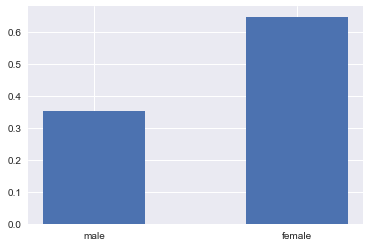

In [380]:
#根据性别计算存活率
female_ratio= (file_name['Sex']=='female').mean()#女性存活率
male_ratio= (file_name['Sex']=='male').mean()#男性存活率
# pclass_sur_ratio.plot(kind='bar')
plt.bar(np.arange(2),[female_ratio,male_ratio],width= 0.5)
plt.xticks((0, 1), ('male', 'female'))
plt.show()

In [201]:
#计算相关系数
print(np.corrcoef(file_name['female'],file_name['Survived'])) 

[[ 1.          0.54335138]
 [ 0.54335138  1.        ]]


计算男女性存活率差异是否显著：

In [441]:
sex_std=file_name.groupby('female').std()['Survived']#根据是否为女性分类，求出标准差
female_std=sex_std[True]#女性标准差
male_std=sex_std[False]#男性标准差

sex_population=file_name.groupby('Sex').count()['Survived']#根据sex分类，求每个分类的个数
female_len=sex_population['female']#女性总数
male_len=sex_population['male']#男性总数

female_mean = file_name.groupby('Sex').mean()['Survived']['female']#女性均值
male_mean = file_name.groupby('Sex').mean()['Survived']['male']#男性均值

z_sex=(female_mean-male_mean)/(np.sqrt((female_std**2/female_len)+(male_std**2/male_len)))#求出标准分

print (z_sex)

18.6718331773


得出:  
标准分为18.7,根据z分表可知，概率小于0.01，差异显著，并非偶然差异导致，因此得出结论：总体中女性存活率大于男性。

结论:
- 女性存活率达到74%，而男性仅为19%，猜测可能是在发生事故时，男同志舍命竭力保护女同志
- Sex与存活率之间相关系数为0.54,呈现为中等相关关系

### 3.年龄(Age)的区间是否与存活率相关？

In [385]:
#年龄中存在缺失值，先进行数据清洗
age_file_name=file_name[file_name['Age'].isnull()==0]

#file_name = file_name.drop(['Cabin','Embarked'], axis =1) #使用dropna处理空值,先删除掉不处理的含有空值的列
#age_file_name = file_name.dropna() # 对仅含有空值的age列dropna

#将年龄分为少年1(0-12)，2青年（13-39），3中年(40-59)，4老年(60及以上)
age_file_name['age_group']=pd.cut(age_file_name['Age'],bins=[0,12,40,60,80],labels=[1,2,3,4])
pd.options.mode.chained_assignment = None# 取消提示

[]

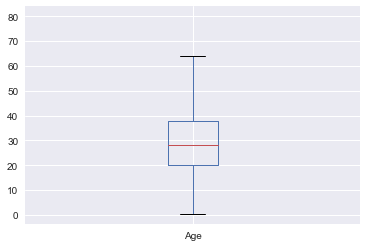

In [392]:
#查看年龄分布
file_name.boxplot(column='Age')
plt.plot()

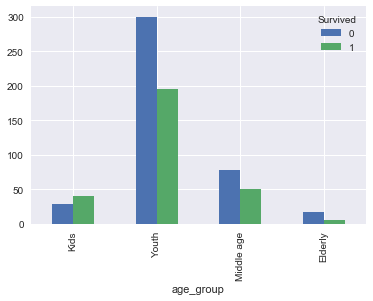

In [387]:
#四个分组死亡和存活人数
age_file_name.groupby(['age_group','Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.xticks((0,1,2,3), ('Kids','Youth','Middle age','Elderly'))
plt.show()

age_group
1    0.579710
2    0.393939
3    0.390625
4    0.227273
Name: Survived, dtype: float64
-----------------------------------------


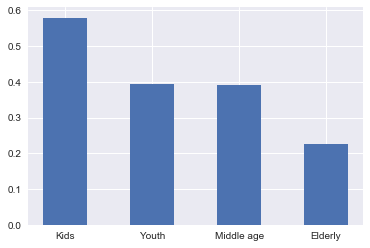

In [382]:
#计算四个分组的生存率
age_sur_ratio=age_file_name.groupby('age_group').mean()['Survived']
print (age_sur_ratio)
print ("-----------------------------------------")
plt.bar(np.arange(4),age_sur_ratio,width=0.5)
plt.xticks((0,1,2,3), ('Kids','Youth','Middle age','Elderly'))
plt.show()

In [383]:
#计算相关系数
np.corrcoef(age_file_name['age_group'],age_file_name['Survived'])

array([[ 1.        , -0.10123238],
       [-0.10123238,  1.        ]])

结论:
- 年龄分布为(0-12)的少年组存活率最高
- 年龄分布为(>60)的老年组存活率最低
- 年龄分布在(12-60)的青年组合中年组存活率相近  
猜测原因是年轻人照顾少年朋友，从而增加了少年存活比例，而老年人由于年龄限制，体力不支，无法向年轻人一样逃生。但相关系数仅为-0.1,表明年龄和存活率为弱相关关系。

### 4. 独自一人(Alone)和有亲友相伴的存活率是否一致？

In [409]:
#将没有亲朋好友看作alone,有朋友做伴看作not_alone
file_name['alone']=file_name['SibSp']+file_name['Parch']+1
file_name['alone']=file_name['alone'].apply(lambda x:2 if x>1 else x )#将>1的改为统一数字，以便后续计算相关系数

file_name['alone_group']=pd.cut(file_name['alone'],bins=[0,1,2],labels=['Alone','NotAlone'])#0-1的数字表示独自一人,1-2表示有人相伴

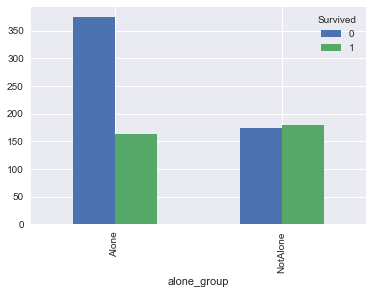

In [410]:
#是否独自一人人数分布
file_name.groupby(['alone_group','Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.show()

In [411]:
#计算是否独自一人计算存活率
alone_sur_ratio=file_name.groupby('alone_group').mean()['Survived']
alone_sur_ratio

alone_group
Alone       0.303538
NotAlone    0.505650
Name: Survived, dtype: float64

In [412]:
#计算相关系数
np.corrcoef(file_name['alone'],file_name['Survived'])

array([[ 1.        ,  0.20336709],
       [ 0.20336709,  1.        ]])

结论:
- 独自一人存活率为30%，不单独时存活率增加至51%,猜测可能为有亲友时，亲友互相照顾互相帮助，增加存活率
- 相关系数为0.2, 呈现弱相关关系


注意：

- 数据集中存在的缺失值，采用直接删除的方式,可能会影响整体数据
- 样本的数据不足900条,，而实际人数约为2224人,若为随机抽样,抽样无偏,可以代表总体情况
- 未分析所在船舱与存活率之间的关系,还有可能与自身健康状况,身高体重等等因素有关
- 其中的分析中结论的得出有些并未使用统计检验,对结论的显著性是否有影响?**(尚有疑问)**
- 单从数据进行分析我们只可以得到相关性，而不能得到因果性